In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [34]:
df= pd.read_csv("Superstore.csv",encoding="latin-1") # used encoding bez dataset contain some special chr
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [35]:
# Now will perfom some basic task for the file analyis means clean the dataset
print("\nBASIC DATASET INFORMATION")
print(df.info()) #information files with object type and number of non null values
print("\n Decribtion For the File")
print(df.describe())
# i have used decribe the function becase it give the EDA analyisi for the data
# Cross Checking for any missing values
missing_values = df.isnull().sum()
missing_values
# No missing values found DATA IS ALREADY TO PERFORM THE ANLYIS


BASIC DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-n

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [37]:
print("EXPLORATORY DATA ANALYSIS (EDA)")
key_columns = ['Sales', 'Quantity', 'Discount', 'Profit']# CHECKING EDA for these coloums
stats = df[key_columns].describe()
print(stats)
# Done using a pre built function

EXPLORATORY DATA ANALYSIS (EDA)
              Sales     Quantity     Discount       Profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574     0.156203    28.656896
std      623.245101     2.225110     0.206452   234.260108
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.728750
50%       54.490000     3.000000     0.200000     8.666500
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000


In [38]:
#KEY FINDINGS:
df['Profit Margin'] = df['Profit'] / df['Sales']
print(f"Sales range from: ${df['Sales'].min():.2f} to ${df['Sales'].max():.2f}")
print(f"People usually buy: {df['Quantity'].mode().iloc[0]} items at once")
print(f"{(df['Discount'] > 0).sum():,} orders had discounts")
print(f"{(df['Profit'] > 0).sum():,} orders were profitable")
print(f"Average profit margin is {(df['Profit Margin'].mean()*100):.1f}%")

Sales range from: $0.44 to $22638.48
People usually buy: 3 items at once
5,196 orders had discounts
8,058 orders were profitable
Average profit margin is 12.0%


In [39]:
#convert dates - important for time charts
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
#  month column for easy grouping and visulization
df['Month'] = df['Order Date'].dt.month_name()
df['Year'] = df['Order Date'].dt.year
df['Year-Month'] = df['Order Date'].dt.strftime('%Y-%m')

Sales by Category (Bar Chart)

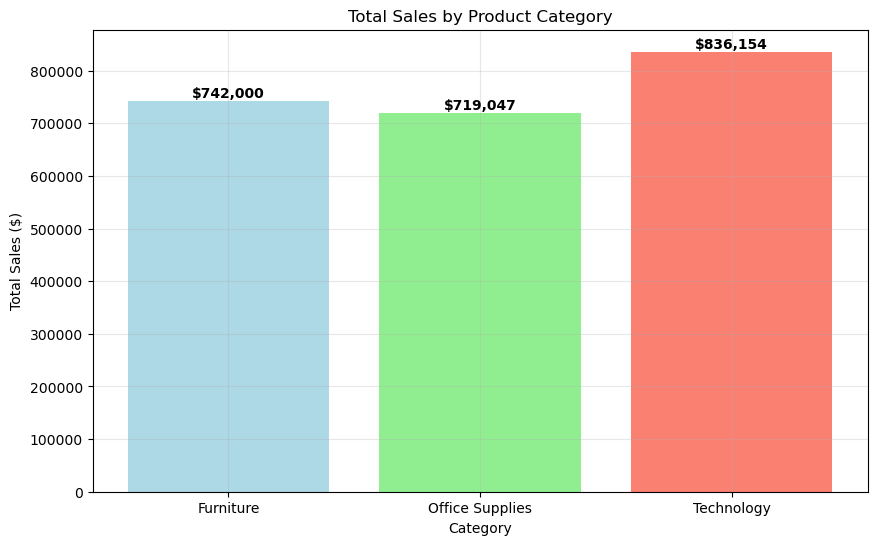


Sales by Category:
  Furniture: $741,999.80
  Office Supplies: $719,047.03
  Technology: $836,154.03


In [40]:
category_sales = df.groupby('Category')['Sales'].sum()
plt.figure(figsize=(10, 6))
bars = plt.bar(category_sales.index, category_sales.values,color=['lightblue', 'lightgreen', 'salmon'])
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales ($)')
# Add value labels on top of bars for eaach sales 
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1000,f'${height:,.0f}', ha='center', va='bottom', fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

print("\nSales by Category:")
for category, sales in category_sales.items():
    print(f"  {category}: ${sales:,.2f}")

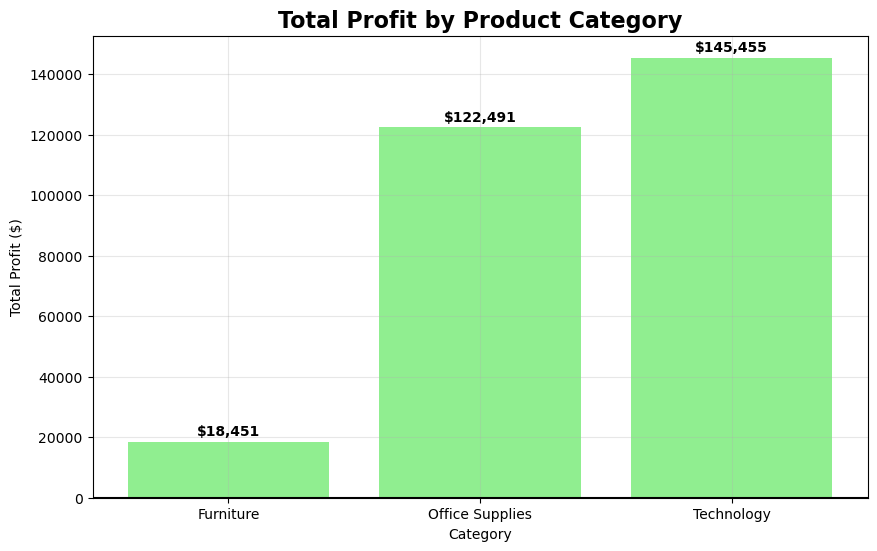

In [41]:
# Profit by Category
category_profit = df.groupby('Category')['Profit'].sum()
plt.figure(figsize=(10, 6))
bars = plt.bar(category_profit.index, category_profit.values, color=colors)
plt.title('Total Profit by Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Total Profit ($)')
plt.axhline(y=0, color='black')
plt.grid(True, alpha=0.3)
for bar in bars:# for the displaying of porfit by each
    height = bar.get_height()
    if height >= 0:
        plt.text(bar.get_x() + bar.get_width()/2., height + 1000,
                 f'${height:,.0f}', ha='center', va='bottom', fontweight='bold')
    else:
        plt.text(bar.get_x() + bar.get_width()/2., height - 1000,
                 f'${height:,.0f}', ha='center', va='top', fontweight='bold', color='red')
plt.show()



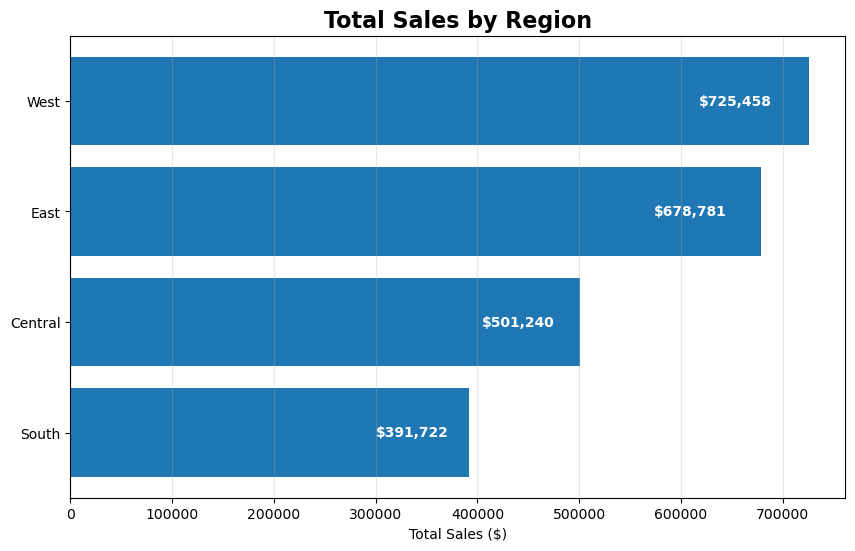


Sales by Region (Highest to Lowest):
  1. South: $391,721.91
  2. Central: $501,239.89
  3. East: $678,781.24
  4. West: $725,457.82


In [42]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=True)
plt.figure(figsize=(10, 6))
bars = plt.barh(region_sales.index, region_sales.values)
plt.title('Total Sales by Region', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales ($)')
# Add values inside bars
for bar in bars:
    width = bar.get_width()
    plt.text(width - width*0.05, bar.get_y() + bar.get_height()/2,
             f'${width:,.0f}', ha='right', va='center', 
             fontweight='bold', color='white')

plt.grid(True, alpha=0.3, axis='x')
plt.show()

print("\nSales by Region (Highest to Lowest):")
for i, (region, sales) in enumerate(region_sales.items(), 1):
    print(f"  {i}. {region}: ${sales:,.2f}")

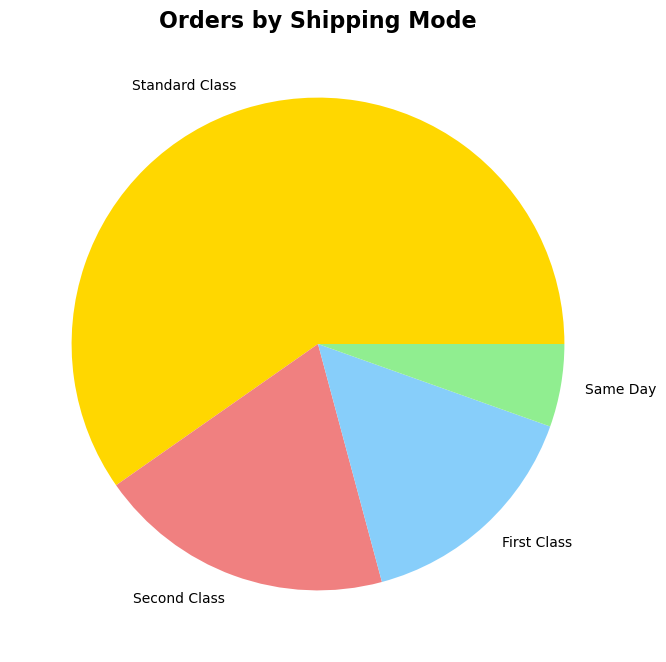

Shipping Mode Distribution:
  Standard Class: 5,968 orders (59.7%)
  Second Class: 1,945 orders (19.5%)
  First Class: 1,538 orders (15.4%)
  Same Day: 543 orders (5.4%)


In [43]:
ship_counts = df['Ship Mode'].value_counts()
plt.figure(figsize=(8, 8))
# Create pie chart
plt.pie(ship_counts.values, labels=ship_counts.index,colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Orders by Shipping Mode', fontsize=16, fontweight='bold')
plt.show()

print("Shipping Mode Distribution:")
for ship_mode, count in ship_counts.items():
    percentage = (count / len(df)) * 100
    print(f"  {ship_mode}: {count:,} orders ({percentage:.1f}%)")

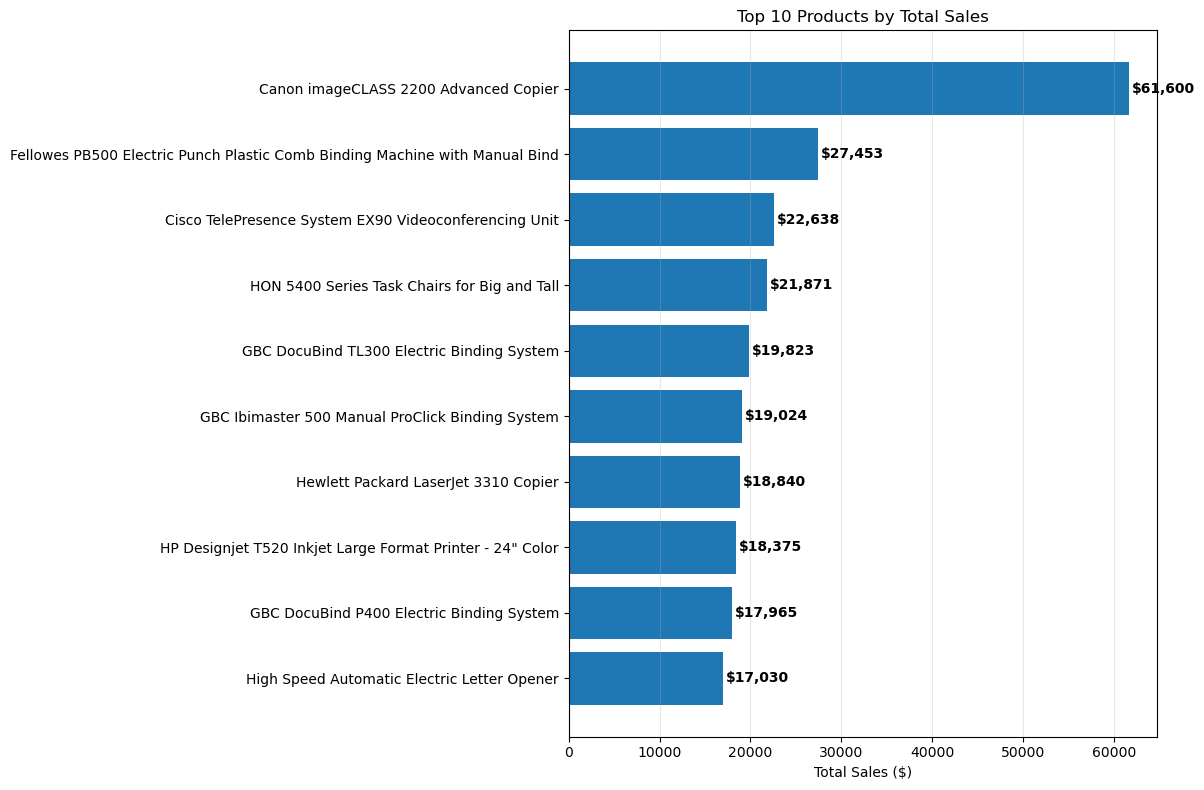


Top 10 Products:
  1. Canon imageCLASS 2200 Advanced Copier: $61,600
  2. Fellowes PB500 Electric Punch Plastic Co: $27,453
  3. Cisco TelePresence System EX90 Videoconf: $22,638
  4. HON 5400 Series Task Chairs for Big and : $21,871
  5. GBC DocuBind TL300 Electric Binding Syst: $19,823
  6. GBC Ibimaster 500 Manual ProClick Bindin: $19,024
  7. Hewlett Packard LaserJet 3310 Copier: $18,840
  8. HP Designjet T520 Inkjet Large Format Pr: $18,375
  9. GBC DocuBind P400 Electric Binding Syste: $17,965
  10. High Speed Automatic Electric Letter Ope: $17,030


In [44]:
# Group by product and sum sales
product_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(product_sales)), product_sales.values[::-1])
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales ($)')
plt.yticks(range(len(product_sales)), product_sales.index[::-1])
# Add values
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + max(product_sales.values)*0.005, bar.get_y() + bar.get_height()/2,
             f'${width:,.0f}', ha='left', va='center', fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nTop 10 Products:")
for i, (product, sales) in enumerate(product_sales.head(10).items(), 1):
    print(f"  {i}. {product[:40]}: ${sales:,.0f}")

In [45]:
# 1. Overall Performance and statical anaylsis
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_profit_margin = (total_profit / total_sales) * 100

print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Profit Margin: {avg_profit_margin:.2f}%")
print(f"Total Orders: {len(df):,}")
print(f"Unique Customers: {df['Customer ID'].nunique():,}")
print(f"Unique Products: {df['Product ID'].nunique():,}")

Total Sales: $2,297,200.86
Total Profit: $286,397.02
Average Profit Margin: 12.47%
Total Orders: 9,994
Unique Customers: 793
Unique Products: 1,862


In [46]:
print("KEY INSIGHTS FROM VISUALIZATIONS:")
print("*"*40)
print(f"1: Best performing category")
best_category = category_sales.idxmax()
print(f"Best Performing Category: {best_category}")
print(f"Sales: ${category_sales[best_category]:,.0f}")

print(f"2: Most profitable category")
most_profitable = category_profit.idxmax()
print(f"Most Profitable Category: {most_profitable}")
print(f"Profit: ${category_profit[most_profitable]:,.0f}")

print(f"3: Best region")
best_region = region_sales.idxmax()
print(f"Top Sales Region: {best_region}")
print(f"Sales: ${region_sales[best_region]:,.0f}")

print(f"4: Most popular shipping")
popular_shipping = ship_counts.idxmax()
print(f"Most Popular Shipping: {popular_shipping}")
print(f"Used in {ship_counts[popular_shipping]:,} orders")



KEY INSIGHTS FROM VISUALIZATIONS:
****************************************
1: Best performing category
Best Performing Category: Technology
Sales: $836,154
2: Most profitable category
Most Profitable Category: Technology
Profit: $145,455
3: Best region
Top Sales Region: West
Sales: $725,458
4: Most popular shipping
Most Popular Shipping: Standard Class
Used in 5,968 orders


# REPORT
The Superstore analysis reveals a profitable operation with 2.3 million in sales and 286,397 in profit, achieving a healthy 12% margin across 9,994 orders. **Office Supplies emerges as the revenue leader** 719K while Technology generates the highest profit $145K,suggesting different strategic values per category. **Geographically, the West region dominates** with 725K in sales, indicating strong market presence or effective regional strategies.

**Critical insight**: Discounts average 15.6%, which requires monitoring as excessive discounting can erode margins. **November shows peak performance** while February lags, revealing seasonal patterns for inventory and staffing planning. **Standard Class shipping is preferred** (60% of orders), suggesting customers value cost over speed.

**Two concerns emerge**: some orders remain unprofitable, and the **Furniture category**, while significant in sales, needs profit optimization**. Immediate actions include increasing Office Supplies inventory, targeted West region marketing, and reviewing unprofitable transactions. Long-term, maintaining the 12.5% profit margin while expanding the customer base from 793 unique buyers will drive sustainable growth.

